# Importing Libraries

In [73]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import time
pd.options.display.max_columns = None
pd.options.display.max_rows = 80
%matplotlib inline

# Q.1 Perform Feature Engineering 

### a) Perform basic exploration like checking for top 5 records, shape, statistical info, duplicates, Null values etc. 

In [74]:
train = pd.read_excel('Flight_Price_Train.xlsx')
test = pd.read_excel('Flight_Price_Test.xlsx')

In [75]:
df = pd.concat([train, test], axis=0, ignore_index=True)

In [76]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [77]:
df.shape

(13354, 11)

In [78]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [79]:
print("Total Duplicated: ", df.duplicated().sum())

Total Duplicated:  246


`There are duplicated values`

In [80]:
print("Total Null Values -")
print('-'*30)
print(df.isnull().sum())

Total Null Values -
------------------------------
Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64


### Removing Duplicates Values & Null Values
`There can't be 2 flights with same departure time, route, price... etc`
`There are only 2 null values so just removing them`

In [81]:
df = df[~df.duplicated()]
df.dropna(inplace=True)

In [82]:
print("Total Duplicated: ", df.duplicated().sum())
print('-'*30)
print("Total Null Values -")
print('-'*30)
print(df.isnull().sum())

Total Duplicated:  0
------------------------------
Total Null Values -
------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


### b) Extract Date, Month, Year from Date of Journey column

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10462 non-null  object 
 1   Date_of_Journey  10462 non-null  object 
 2   Source           10462 non-null  object 
 3   Destination      10462 non-null  object 
 4   Route            10462 non-null  object 
 5   Dep_Time         10462 non-null  object 
 6   Arrival_Time     10462 non-null  object 
 7   Duration         10462 non-null  object 
 8   Total_Stops      10462 non-null  object 
 9   Additional_Info  10462 non-null  object 
 10  Price            10462 non-null  float64
dtypes: float64(1), object(10)
memory usage: 980.8+ KB


In [84]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0


In [85]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [86]:
df['Date'] = df['Date_of_Journey'].dt.day
df['Month'] = df['Date_of_Journey'].dt.month
df['Year'] = df['Date_of_Journey'].dt.year

# Q.2 Perform Exploratory Data Analysis (EDA) tasks
#### a) Which airline is most preferred airline - Jet Airways
#### c) Find the majority of the flights take off from which source - Delhi
#### d) Find maximum flights land in which destination - Cochin

In [87]:
def unique(data):
    for col in df.columns:
        print(col, "---" , data[col].nunique())

In [88]:
def values(data):
    for col in df.columns:
        if data[col].nunique() < 15:
            print(col)
            print("----------------"*2)                        
            print(data[col].value_counts())
            print("---------------"*8)            

In [89]:
unique(df)

Airline --- 12
Date_of_Journey --- 40
Source --- 5
Destination --- 6
Route --- 128
Dep_Time --- 222
Arrival_Time --- 1343
Duration --- 368
Total_Stops --- 5
Additional_Info --- 10
Price --- 1870
Date --- 9
Month --- 7
Year --- 1


In [90]:
values(df)

Airline
--------------------------------
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Source
--------------------------------
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Destination
---------------------

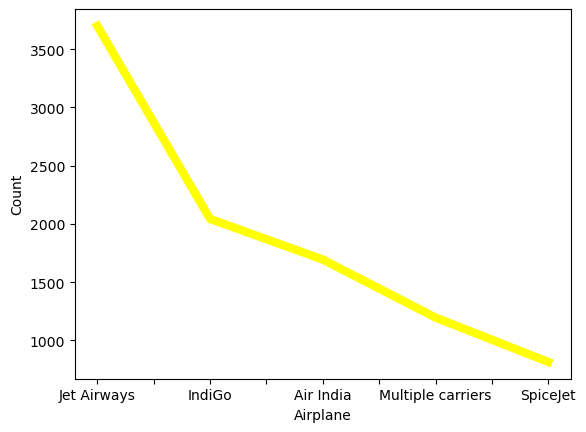

In [91]:
df['Airline'].value_counts().sort_values(ascending=False).head(5).plot(color='yellow', linewidth=6)
plt.xlabel("Airplane")
plt.ylabel("Count")
plt.show()

##### `From above graph, we can see the` **Jet AirWays** `is the most preferred`

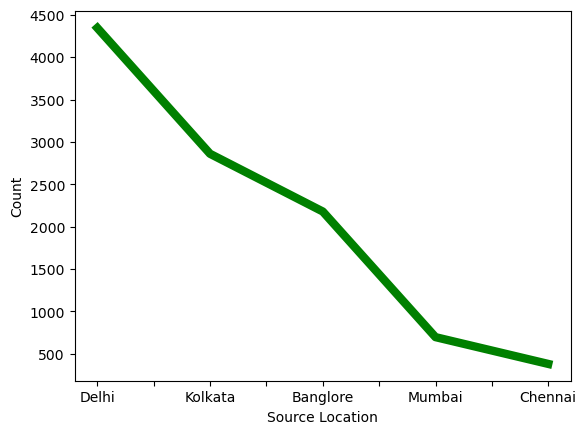

In [92]:
df['Source'].value_counts().sort_values(ascending=False).head(5).plot(color='green', linewidth=6)
plt.xlabel("Source Location")
plt.ylabel("Count")
plt.show()

##### `From above graph, we can see the` **Delhi** `is the most commonly used Departure Airport `

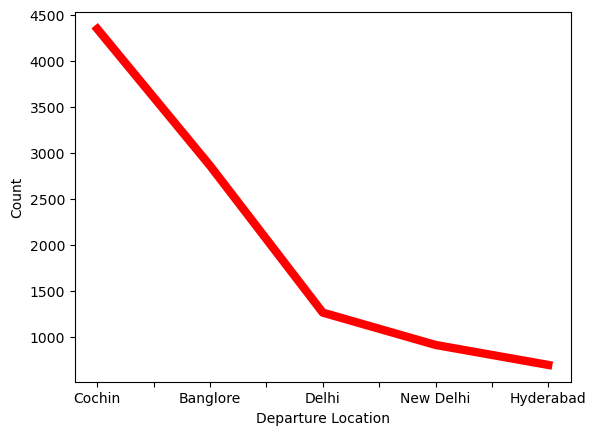

In [93]:
df['Destination'].value_counts().sort_values(ascending=False).head(5).plot(color='red',linewidth=6)
plt.xlabel("Departure Location")
plt.ylabel("Count")
plt.show()

##### `From above graph, we can see the` **Cochin** `is the most commonly used Departure Airport `

# Q.3 Compare independent features with Target feature to check the impact on price
#### a) Which airline has the highest price - Jet Airways Business
#### b) Check if the business class flights are high price or low and find only those flights which price is higher than 50k

In [94]:
df[df['Price'] == df['Price'].max()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
2924,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512.0,3,1,2019


**Jet Airways Business** `Is the most expensive line costing` **79512!!**

In [95]:
df['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

## Grouping Similar Values

In [96]:
category_mapping = {
    'No info': 'No Information',
    'No Info': 'No Information',
    'In-flight meal not included': 'No In-flight Meal',
    'No check-in baggage included': 'No Check-in Baggage',
    '1 Short layover': 'Layover',
    '1 Long layover': 'Layover',
    '2 Long layover': 'Layover',
    'Business class': 'Business class',
    'Red-eye flight': 'No Information',
    'Change airports': 'Halt'
    
}

df['Category'] = df['Additional_Info'].map(category_mapping)


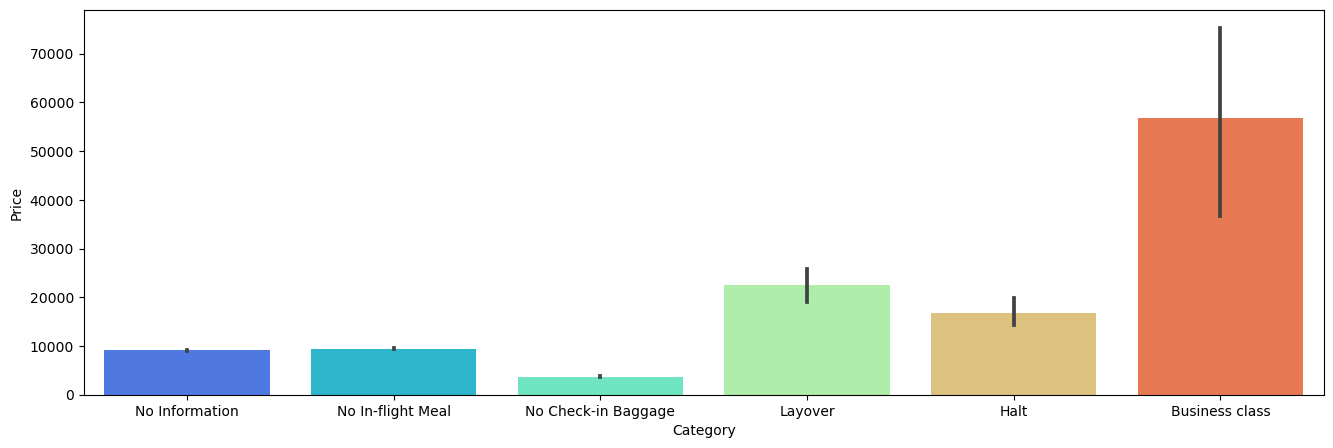

In [97]:
plt.figure(figsize = (16,5))
sns.barplot(x='Category', y='Price', data=df, palette='rainbow', width=0.8)
plt.show()

In [98]:
business_flights = df[(df['Price'] > 50000) & (df['Category'] == 'Business class')]

In [99]:
business_flights

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Category
2924,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512.0,3,1,2019,Business class
5372,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427.0,3,1,2019,Business class
10364,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209.0,3,1,2019,Business class


`Business Class Flights are the most` **expensive** `flights & There are 3 flights with Price > 50000` 

# Q.4 Perform encoding for the required features according to the data

In [100]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'Category'],
      dtype='object')

In [101]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Category
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,No Information
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,5,1,2019,No Information


In [102]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

In [103]:
df['dep_hr'] = df['Dep_Time'].dt.hour
df['dep_min'] = df['Dep_Time'].dt.minute
df['dep_day'] = df['Dep_Time'].dt.day
df['dep_mt'] = df['Dep_Time'].dt.month
df['arr_hr'] = df['Arrival_Time'].dt.hour
df['arr_day'] = df['Arrival_Time'].dt.day
df['arr_mt'] = df['Arrival_Time'].dt.month

`Required Features - `Airline, Source ,Destination, Category`

### Dropping Uneccessary Columns

In [104]:
Drop = ['Year','Route','Dep_Time','Arrival_Time','Duration', 'Date_of_Journey']

In [105]:
df.drop(columns=Drop, inplace=True)
df.drop(columns=['Additional_Info'], inplace=True)

## Applying Get dummies

In [106]:
enc_features = ['Airline', 'Source' ,'Destination', 'Category','Total_Stops']

In [107]:
final_df = pd.get_dummies(df, columns=enc_features)

In [108]:
X = final_df.drop(columns=['Price'])
y = pd.DataFrame(final_df['Price'])

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Scaling

In [110]:
final_df

,Price,Date,Month,dep_hr,dep_min,dep_day,dep_mt,arr_hr,arr_day,arr_mt,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Category_Business class,Category_Halt,Category_Layover,Category_No Check-in Baggage,Category_No In-flight Meal,Category_No Information,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,3897.0,24,3,22,20,30,10,1,22,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,7662.0,5,1,5,50,30,10,13,30,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,13882.0,6,9,9,25,30,10,4,10,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,6218.0,5,12,18,5,30,10,23,30,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,13302.0,3,1,16,50,30,10,21,30,10,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4107.0,4,9,19,55,30,10,22,30,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
10679,4145.0,27,4,20,45,30,10,23,30,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
10680,7229.0,27,4,8,20,30,10,11,30,10,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
10681,12648.0,3,1,11,30,30,10,14,30,10,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [111]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)
# y_train = sc.fit_transform(y_train)
# y_test = sc.fit_transform(y_test)

# Q.5 Build multiple model by using different algorithm such as Linear Regression, Decision Tree, and Random Forest etc. and check theperformance of your model.

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error

In [114]:
# sc = StandardScaler()
# df = sc.fit_transform(final_df)

In [115]:
y_train

,Price
6727,4575.0
6322,15554.0
6874,13377.0
3493,5069.0
611,6745.0
...,...
5799,4823.0
5247,7832.0
5452,5073.0
861,6015.0


## LINEAR REGRESSION

In [116]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [117]:
pred_1 = lr.predict(X_test)

In [118]:
r2_score(pred_1,y_test)

0.45861001902448173

## Random Forest

In [119]:
print()

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from math import sqrt

In [121]:
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=8, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_jobs=-1, random_state=42)

In [122]:
pred_2 = model.predict(X_test)
r2 = r2_score(y_test, pred_2)
mse = mean_squared_error(y_test, pred_2)
rmse = sqrt(mse)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R2 Score: 0.8549432499886289
Mean Squared Error: 3024473.3282181877
Root Mean Squared Error: 1739.1012990099764


## SVR

In [123]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R2 Score: 0.0003464941005467681
Mean Squared Error: 20843051.88014822
Root Mean Squared Error: 4565.419135210723


## Extra Tree

In [125]:
from sklearn.ensemble import ExtraTreesRegressor
model_ExtraTrees = ExtraTreesRegressor(n_estimators=50,random_state=10, max_depth=9)
model_ExtraTrees.fit(X_train,y_train)
y_pred = model_ExtraTrees.predict(X_test)

In [126]:
from sklearn.metrics import confusion_matrix, accuracy_score
acc=r2_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

Accuracy of the model:  0.8323215659488873
